# -----------------------------------------------------
#    Extract flow direction file just for western US
# -----------------------------------------------------

In [1]:
import xarray as xr
import numpy as np
import linecache
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
path_flow_dir = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/misc/flow_dir.asc'
ascii_grid = np.loadtxt(path_flow_dir, skiprows=6)
fdir_df = pd.DataFrame(ascii_grid)

In [3]:
# -------------- extract flow direction info --------
ncolx = linecache.getline(path_flow_dir, 1)
nrowx = linecache.getline(path_flow_dir, 2)
xcornerx = linecache.getline(path_flow_dir, 3)  #bottom
ycornerx = linecache.getline(path_flow_dir, 4)  #far left
cellx = linecache.getline(path_flow_dir, 5)  # cell size in degrees

In [4]:
# ---- just enter manually ---
ncolx = 5760
nrowx = 2240
xcornerx = -180.000000
ycornerx =-56.000000
cellx = 0.062500

In [5]:
np.linspace( ycornerx,ycornerx+((nrowx-1)*cellx), nrowx)[1500:1600]

array([ 37.75  ,  37.8125,  37.875 ,  37.9375,  38.    ,  38.0625,
        38.125 ,  38.1875,  38.25  ,  38.3125,  38.375 ,  38.4375,
        38.5   ,  38.5625,  38.625 ,  38.6875,  38.75  ,  38.8125,
        38.875 ,  38.9375,  39.    ,  39.0625,  39.125 ,  39.1875,
        39.25  ,  39.3125,  39.375 ,  39.4375,  39.5   ,  39.5625,
        39.625 ,  39.6875,  39.75  ,  39.8125,  39.875 ,  39.9375,
        40.    ,  40.0625,  40.125 ,  40.1875,  40.25  ,  40.3125,
        40.375 ,  40.4375,  40.5   ,  40.5625,  40.625 ,  40.6875,
        40.75  ,  40.8125,  40.875 ,  40.9375,  41.    ,  41.0625,
        41.125 ,  41.1875,  41.25  ,  41.3125,  41.375 ,  41.4375,
        41.5   ,  41.5625,  41.625 ,  41.6875,  41.75  ,  41.8125,
        41.875 ,  41.9375,  42.    ,  42.0625,  42.125 ,  42.1875,
        42.25  ,  42.3125,  42.375 ,  42.4375,  42.5   ,  42.5625,
        42.625 ,  42.6875,  42.75  ,  42.8125,  42.875 ,  42.9375,
        43.    ,  43.0625,  43.125 ,  43.1875,  43.25  ,  43.3

In [6]:
np.linspace(xcornerx,xcornerx+((ncolx-1)*cellx), ncolx)[1500:1600]

array([-86.25  , -86.1875, -86.125 , -86.0625, -86.    , -85.9375,
       -85.875 , -85.8125, -85.75  , -85.6875, -85.625 , -85.5625,
       -85.5   , -85.4375, -85.375 , -85.3125, -85.25  , -85.1875,
       -85.125 , -85.0625, -85.    , -84.9375, -84.875 , -84.8125,
       -84.75  , -84.6875, -84.625 , -84.5625, -84.5   , -84.4375,
       -84.375 , -84.3125, -84.25  , -84.1875, -84.125 , -84.0625,
       -84.    , -83.9375, -83.875 , -83.8125, -83.75  , -83.6875,
       -83.625 , -83.5625, -83.5   , -83.4375, -83.375 , -83.3125,
       -83.25  , -83.1875, -83.125 , -83.0625, -83.    , -82.9375,
       -82.875 , -82.8125, -82.75  , -82.6875, -82.625 , -82.5625,
       -82.5   , -82.4375, -82.375 , -82.3125, -82.25  , -82.1875,
       -82.125 , -82.0625, -82.    , -81.9375, -81.875 , -81.8125,
       -81.75  , -81.6875, -81.625 , -81.5625, -81.5   , -81.4375,
       -81.375 , -81.3125, -81.25  , -81.1875, -81.125 , -81.0625,
       -81.    , -80.9375, -80.875 , -80.8125, -80.75  , -80.6

In [7]:
flow_dir_global = xr.DataArray(fdir_df.as_matrix(), 
                               coords=[np.linspace( ycornerx+((nrowx-1)*cellx),ycornerx, nrowx), 
                                       np.linspace(xcornerx,xcornerx+((ncolx-1)*cellx), ncolx)], 
                               dims=['lat', 'lon'])

In [69]:
lat0 = 50
lat1 = 32
lon0 = -126
lon1 = -109

In [79]:
latx = np.linspace( ycornerx,ycornerx+((nrowx-1)*cellx), nrowx)
lonx = np.linspace(xcornerx,xcornerx+((ncolx-1)*cellx), ncolx)
lat_index = [i for i, x in enumerate(latx) if x > lat1 and x < lat0]
lon_index = [i for i, x in enumerate(lonx) if x < lon1 and x > lon0]

In [145]:
# -------- get flow direction ONLY for western U.S.
flow_dir_west = flow_dir_global.sel(lat=slice(lat0, lat1), lon=slice(lon0, lon1))
#flow_dir_west = flow_dir_global.sel(lon=slice(lon0, lon1))
#flow_dir_west = flow_dir_west.sel(lat=slice(lat1, lat0))

In [146]:
np.max(flow_dir_west.values)

128.0

In [147]:
flow_dir_west.lon

<xarray.DataArray 'lon' (lon: 273)>
array([-126.    , -125.9375, -125.875 , ..., -109.125 , -109.0625, -109.    ])
Coordinates:
  * lon      (lon) float64 -126.0 -125.9 -125.9 -125.8 -125.8 -125.7 -125.6 ...

<xarray.DataArray 'lat' (lat: 289)>
array([ 50.    ,  49.9375,  49.875 , ...,  32.125 ,  32.0625,  32.    ])
Coordinates:
  * lat      (lat) float64 50.0 49.94 49.88 49.81 49.75 49.69 49.62 49.56 ...

In [165]:
from matplotlib import colors

cmap = colors.ListedColormap(['grey','red', 'pink', 'orange','yellow', 'green','cyan', 'blue', 'purple','black' ])
bounds=[-100,0,1,2,4,8,16,32,64,130]
norm = colors.BoundaryNorm(bounds, cmap.N)


In [169]:
cmap = colors.ListedColormap(['grey','red', 'pink','magenta', 'orange','yellow', 'green','cyan',  'blue', 'purple','black'])
bounds=[-100,0,1,2,4,8,16,32,64,128]
bounds=[-100,-1,1.5,3,5,9,17,34,65,129]
norm = colors.BoundaryNorm(bounds, cmap.N)

(-125, -120)

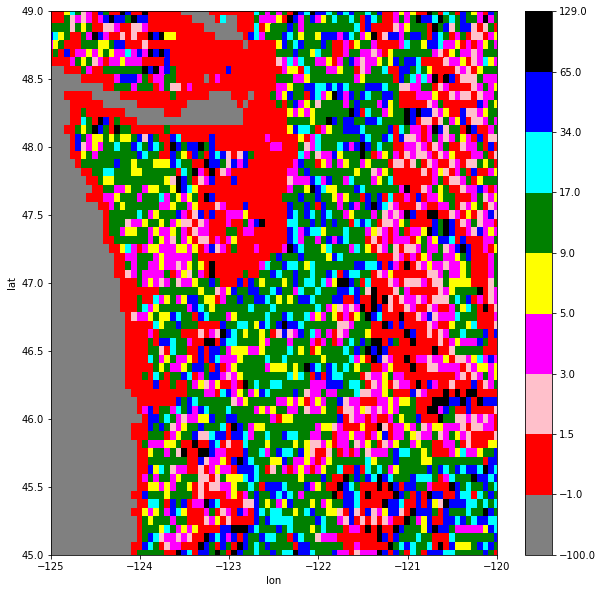

In [170]:
plt.figure(figsize=[10,10])
flow_dir_west.plot.pcolormesh('lon', 'lat', cmap=cmap, norm=norm)
plt.ylim([45,49])
plt.xlim([-125,-120])